## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

#### Пропусков в данных и категориальных признаков нет

In [35]:
X.apply(lambda col: col.unique())

alcohol                         [14.23, 13.2, 13.16, 14.37, 13.24, 14.2, 14.39...
malic_acid                      [1.71, 1.78, 2.36, 1.95, 2.59, 1.76, 1.87, 2.1...
ash                             [2.43, 2.14, 2.67, 2.5, 2.87, 2.45, 2.61, 2.17...
alcalinity_of_ash               [15.6, 11.2, 18.6, 16.8, 21.0, 15.2, 14.6, 17....
magnesium                       [127.0, 100.0, 101.0, 113.0, 118.0, 112.0, 96....
total_phenols                   [2.8, 2.65, 3.85, 3.27, 2.5, 2.6, 2.98, 2.95, ...
flavanoids                      [3.06, 2.76, 3.24, 3.49, 2.69, 3.39, 2.52, 2.5...
nonflavanoid_phenols            [0.28, 0.26, 0.3, 0.24, 0.39, 0.34, 0.31, 0.29...
proanthocyanins                 [2.29, 1.28, 2.81, 2.18, 1.82, 1.97, 1.98, 1.2...
color_intensity                 [5.64, 4.38, 5.68, 7.8, 4.32, 6.75, 5.25, 5.05...
hue                             [1.04, 1.05, 1.03, 0.86, 1.02, 1.06, 1.08, 1.0...
od280/od315_of_diluted_wines    [3.92, 3.4, 3.17, 3.45, 2.93, 2.85, 3.58, 3.55...
proline         

In [3]:
X.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [37]:
from sklearn.model_selection import train_test_split
X_tr, X_t, y_tr, y_t = train_test_split(X, y, test_size=0.3, random_state=27)
X_tr.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
89,12.08,1.33,2.30,23.6,70.0,2.20,1.59,0.42,1.38,1.74,1.07,3.21,625.0
123,13.05,5.80,2.13,21.5,86.0,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380.0
170,12.20,3.03,2.32,19.0,96.0,1.25,0.49,0.40,0.73,5.50,0.66,1.83,510.0
153,13.23,3.30,2.28,18.5,98.0,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675.0
49,13.94,1.73,2.27,17.4,108.0,2.88,3.54,0.32,2.08,8.90,1.12,3.10,1260.0


**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

print('NN    Train    Test')

stdscl = StandardScaler()

n_tr = pd.DataFrame(stdscl.fit_transform(X_tr[['alcohol', 'magnesium']]))
n_t = pd.DataFrame(stdscl.transform(X_t[['alcohol', 'magnesium']]))

for i in [1, 3, 5, 10, 15, 25]:
    clf = KNeighborsClassifier(n_neighbors=i)
    y_tr_predicted = clf.fit(n_tr, y_tr).predict(n_tr)
    acur1 = np.mean(y_tr == y_tr_predicted)
    y_t_predicted = clf.predict(n_t)
    acur2 = np.mean(y_t == y_t_predicted)
    print('{:.0f}     {:.2f}     {:.2f}'.format(i, acur1, acur2))

NN    Train    Test
1     0.99     0.63
3     0.83     0.63
5     0.81     0.65
10     0.80     0.70
15     0.77     0.65
25     0.75     0.59


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [39]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [40]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

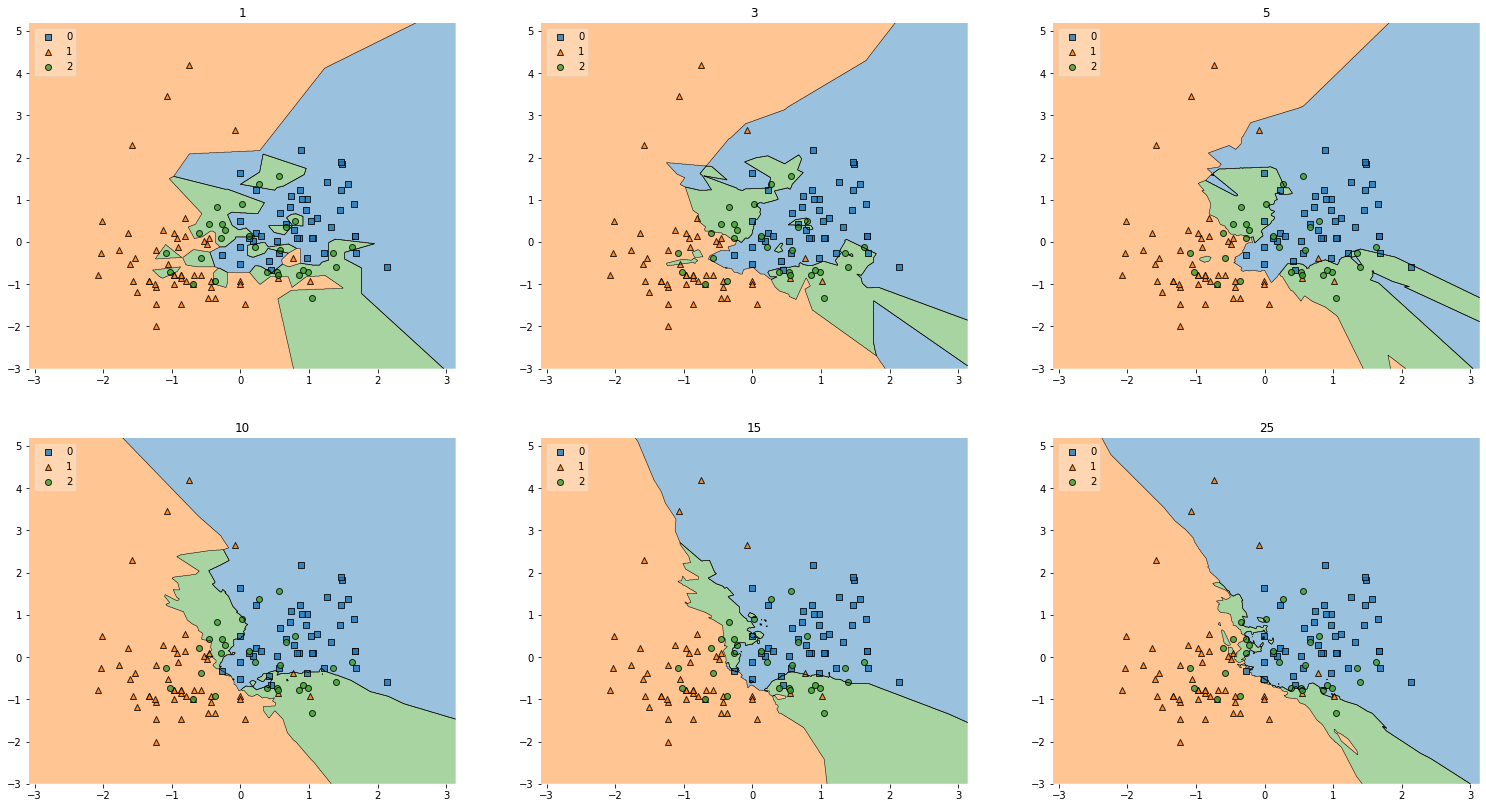

In [42]:
import itertools
import matplotlib.gridspec as gridspec
from mlxtend.plotting import plot_decision_regions

gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(26,14))


for i, grd in zip([1, 3, 5, 10, 15, 25], itertools.product([0, 1, 2], repeat=2)):
    clf = KNeighborsClassifier(n_neighbors=i)
    y_predicted = clf.fit(n_tr, y_tr).predict(n_t)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X = np.asarray(n_tr), y = y_tr, clf=clf, legend=2)
    plt.title(i)

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

#### Для k = 1 на train-выборке достигается accuracy 0.99 и понижается с повышением k (с большим k больше вероятность попасть в неверный класс, а для k = 1 классификатор всегда выдает класс этого же объекта). На test-выборке качество растет с повышением k до ≈10, а дальше снова падает. Также это видно по разделяющим поверхностям: для малых k - слишком сложная, для больших k - слишком простые.

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

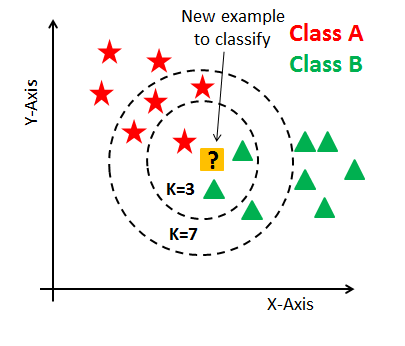

In [43]:
import numpy as np
from collections import Counter 
from numpy import linalg

class KNN:
    def __init__(self, k:int):
        self.k = k
    
    def fit(self, X, y):
        self.x = X
        self.y = y
    
    def predict(self, X):
        y = []
        for x in X:
            dist = linalg.norm(self.x - x, axis=1)
            y_sorted = self.y[dist.argsort()]
            y.append(int(Counter(y_sorted[:self.k]).most_common(1)[0][0]))
        return np.array(y)

In [44]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [45]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [46]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

#### Пропущенных данных нет

In [48]:
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

#### Unnamed:0 - дополнительный индекс - бесполезный столбец

In [49]:
data.pop('Unnamed: 0')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

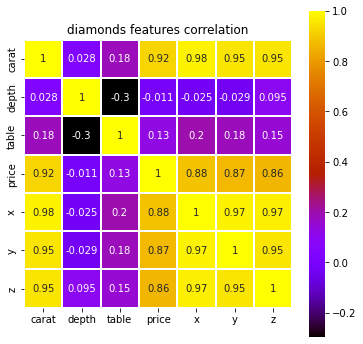

In [50]:
import seaborn as sns

data_num = data._get_numeric_data()
colormap = 'gnuplot'
plt.figure(figsize=(6,6))
plt.title('diamonds features сorrelation')
sns.heatmap(data_num.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

#### Больше всего коррелирует карат, а также признаки x, y, z

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [51]:
data_num = pd.get_dummies(data,drop_first = True)
data_num.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [52]:
y = data_num['price']
data_num.pop('price')
X = data_num

from sklearn.model_selection import train_test_split
X_tr, X_t, y_tr, y_t = train_test_split(X, y, test_size=0.3, random_state=17)
X_tr.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
43455,0.50,63.0,59.0,5.01,4.99,3.15,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
46421,0.66,61.3,57.2,5.59,5.66,3.45,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
25131,1.51,62.5,58.0,7.23,7.27,4.53,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
17365,1.01,63.9,59.0,6.34,6.31,4.04,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
27858,0.30,61.9,55.1,4.31,4.34,2.68,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [53]:
from sklearn.preprocessing import StandardScaler

cols_to_scale = ['carat', 'depth', 'table', 'x', 'y', 'z']
std_scl = StandardScaler()

std_scl.fit(X_tr[cols_to_scale])

X_tr[cols_to_scale] = std_scl.transform(X_tr[cols_to_scale])
X_t[cols_to_scale] = std_scl.transform(X_t[cols_to_scale])


X_tr.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
43455,-0.629697,0.874681,0.690925,-0.644203,-0.650678,-0.550072,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
46421,-0.291784,-0.313340,-0.115369,-0.126741,-0.065838,-0.126835,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
25131,1.503379,0.525263,0.242984,1.336425,1.339525,1.396820,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
17365,0.447400,1.503633,0.690925,0.542390,0.501545,0.705532,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
27858,-1.052089,0.105962,-1.056045,-1.268725,-1.218060,-1.213145,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [54]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

regr = linear_model.LinearRegression()

regr.fit(X_tr, y_tr)
y_tr_p = regr.predict(X_tr)
print('Train error: {:.2f}'.format(mean_squared_error(y_tr_p,y_tr)))

y_t_p = regr.predict(X_t)
linreg_acc = (mean_squared_error(y_t_p,y_t))
print('Test error: {:.2f}'.format(linreg_acc))

Train error: 1274045.01
Test error: 1283045.88


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [55]:
print(pd.DataFrame(regr.coef_).values.reshape(-1))

[ 5.36165884e+03 -9.48164016e+01 -6.18676752e+01 -1.14646245e+03
 -2.17916189e+00 -3.24823858e+01  5.76615369e+02  8.27171236e+02
  7.51876170e+02  7.29412980e+02 -2.14149628e+02 -2.80677241e+02
 -4.86264237e+02 -9.91300830e+02 -1.48523278e+03 -2.36740128e+03
  5.30270098e+03  3.60931620e+03  2.63313281e+03  4.51975058e+03
  4.21271940e+03  4.95525477e+03  4.90365873e+03]


#### Самый выделяющийся вес у признака карат

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [56]:
las = linear_model.Lasso(alpha = 10)
las.fit(X_tr, y_tr)
y_p = las.predict(X_t)
print('Lasso test error: {:.2f}'.format(mean_squared_error(y_p,y_t)))
print(pd.DataFrame(las.coef_).values.reshape(-1))

rid = linear_model.Ridge(alpha = 10)
rid.fit(X_tr, y_tr)
y_p = rid.predict(X_t)
print('Ridge test error: {:.2f}'.format(mean_squared_error(y_p,y_t)))
print(pd.DataFrame(rid.coef_).values.reshape(-1))

Lasso test error: 1524300.37
[ 4784.8731456   -151.61735075  -110.28984043  -705.57349493
    -0.           -24.70611455    -0.           168.75614666
    79.95539911   100.32350467     0.            -0.
  -115.45246738  -611.10554289 -1016.66237008 -1765.57460106
  1325.28959079     0.          -818.94545701   820.57499926
   579.33521165  1160.80644373  1175.42103168]
Ridge test error: 1289117.51
[ 5.30945108e+03 -9.72851389e+01 -6.49866960e+01 -1.10482420e+03
 -1.19349193e+00 -3.52035871e+01  5.99639063e+02  8.54869106e+02
  7.77249955e+02  7.59938179e+02 -2.02128463e+02 -2.67283519e+02
 -4.68399125e+02 -9.73774503e+02 -1.46070905e+03 -2.33025924e+03
  4.72262019e+03  3.07322285e+03  2.10469036e+03  3.97475308e+03
  3.67317261e+03  4.39670549e+03  4.35228113e+03]


#### Веса незначительно уменьшились, проблема мультиколлинеарности не сильно проявлялась

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

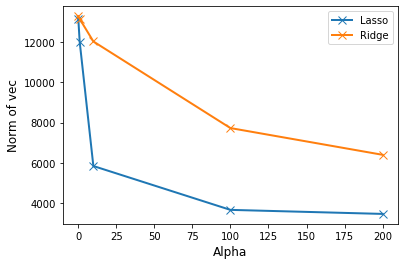

In [57]:
las_norm, rid_norm, alphas = [],[], [0.1, 1, 10, 100, 200]
for a in alphas:
    las = linear_model.Lasso(alpha = a)
    las.fit(X_tr, y_tr)
    y_p = las.predict(X_t)
    las_norm.append(np.linalg.norm(las.coef_))

    rid = linear_model.Ridge(alpha = a)
    rid.fit(X_tr, y_tr)
    y_p = rid.predict(X_t)
    rid_norm.append(np.linalg.norm(rid.coef_))
    
plt.figure(figsize = (6, 4))
plt.plot(alphas, las_norm, 'x-', ms = 8, lw = 2, label='Lasso')
plt.plot(alphas, rid_norm, 'x-', ms = 8, lw = 2, label='Ridge')
plt.legend()
plt.xlabel('Alpha', fontsize = 'large')
plt.ylabel('Norm of vec', fontsize = 'large')
plt.show()

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [58]:
optimal = alphas[np.argmin(np.mean(linear_model.LassoCV(cv = 5, alphas= alphas, tol=1e-2, max_iter = 1e6).fit(X_tr,
        y_tr).mse_path_, axis = 1))]

print('Лучшее значение параметра регуляризации: {}'.format(optimal))

Лучшее значение параметра регуляризации: 200


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [60]:
las = linear_model.Lasso(alpha = optimal).fit(X_tr,y_tr)

print(pd.DataFrame(las.coef_).values.reshape(-1))

[3475.94600281   -0.           -0.            0.            0.
    0.           -0.            0.           -0.           -0.
    0.            0.            0.           -0.           -0.
   -0.            0.           -0.           -0.            0.
    0.            0.            0.        ]


#### Не занулился и остался очень большим вес только параметра карат как самый скоррелированный

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [63]:
y_p = las.predict(X_t)
print('Train error lasso: {:.2f}'.format(mean_squared_error(y_p,y_t)))
print('Train error regretion: {:.2f}'.format(linreg_acc))

Train error lasso: 2434507.63
Train error regretion: 1283045.88


#### Как и ожидалось, регуляризованная модель оказалась хуже, так как регуляризация не помогает добиться лучшего качества, а лишь помогает бороться с переобучением которого и так не было